# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zsar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
btc_news["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
 'publishedAt': '2021-09-16T13:26:42Z',
 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "ethereum", language = "en")
eth_news["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Kim Lyons',
 'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
 'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
 'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2021-09-24T16:22:55Z',
 'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(eth_sentiments)

In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.111215,0.05125,0.025700,0.923150
std,0.305541,0.04245,0.048141,0.064881
min,-0.709600,0.00000,0.000000,0.765000
25%,0.000000,0.00000,0.000000,0.886250
50%,0.128000,0.04900,0.000000,0.936500
75%,0.252000,0.07900,0.037750,0.965500
max,0.557400,0.12700,0.195000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.243075,0.081200,0.023850,0.895050
std,0.383510,0.073105,0.049345,0.084483
min,-0.670500,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.836750
50%,0.354000,0.083500,0.000000,0.904500
75%,0.458800,0.112750,0.009000,0.952500
max,0.876500,0.245000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH, Positive Mean = 0.08

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()


# Create a list of stopwords
stop = stopwords.words('english')


# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[wnl.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.Text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
1,0.0000,0.000,0.000,1.000,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, inap..."
2,0.0000,0.000,0.000,1.000,Bitcoin and similar blockchain-based cryptos e...,"[bitcoin, similar, blockchainbased, cryptos, e..."
3,0.1901,0.091,0.043,0.866,Elon Musk has performed a sudden U-turn on bit...,"[elon, musk, ha, performed, sudden, uturn, bit..."
4,0.0000,0.000,0.000,1.000,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci..."


In [17]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci..."
1,0.7351,0.167,0.000,0.833,As the broader crypto world enjoys a late summ...,"[broader, crypto, world, enjoys, late, summer,..."
2,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
3,0.2865,0.180,0.126,0.694,OpenSea isn't wasting much time after its head...,"[opensea, isnt, wasting, much, time, head, pro..."
4,0.4588,0.108,0.000,0.892,Robinhood plans to start a cryptocurrency wall...,"[robinhood, plan, start, cryptocurrency, walle..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_gram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.tokens]
dict(btc_gram_counts[0].most_common(10))

{('wont', 'stick'): 1,
 ('stick', 'bitcoin'): 1,
 ('bitcoin', 'youre'): 1,
 ('youre', 'determined'): 1,
 ('determined', 'pay'): 1,
 ('pay', 'movie'): 1,
 ('movie', 'ticket'): 1,
 ('ticket', 'cryptocurrency'): 1,
 ('cryptocurrency', 'amc'): 1,
 ('amc', 'chief'): 1}

In [20]:
# Generate the Ethereum N-grams where N=2
eth_gram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.tokens]
dict(eth_gram_counts[0].most_common(10))

{('country', 'latest'): 1,
 ('latest', 'crackdown'): 1,
 ('crackdown', 'digital'): 1,
 ('digital', 'currenciesillustration'): 1,
 ('currenciesillustration', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'vergethe'): 1,
 ('vergethe', 'peoples'): 1,
 ('peoples', 'bank'): 1,
 ('bank', 'china'): 1}

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
btcstr = []
for tokens in btc_df.tokens:
    btcstr += tokens
btc_token_count = token_count(btcstr)
btc_token_count

[('char', 18),
 ('bitcoin', 17),
 ('cryptocurrency', 9),
 ('el', 8),
 ('country', 7),
 ('salvador', 6),
 ('first', 4),
 ('company', 4),
 ('central', 4),
 ('government', 4)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
ethstr = []
for tokens in eth_df.tokens:
    ethstr += tokens
eth_token_count = token_count(ethstr)
eth_token_count

[('char', 20),
 ('ha', 15),
 ('cryptocurrency', 7),
 ('ethereum', 6),
 ('bitcoin', 5),
 ('time', 5),
 ('buterin', 4),
 ('friday', 3),
 ('world', 3),
 ('blockchain', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

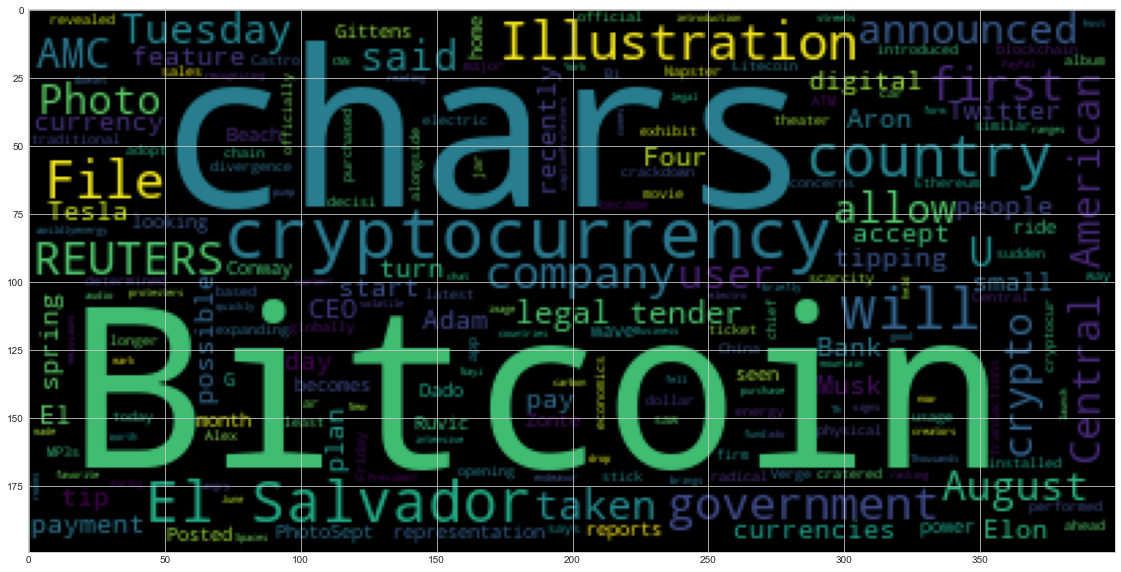

In [29]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_df['Text'])
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

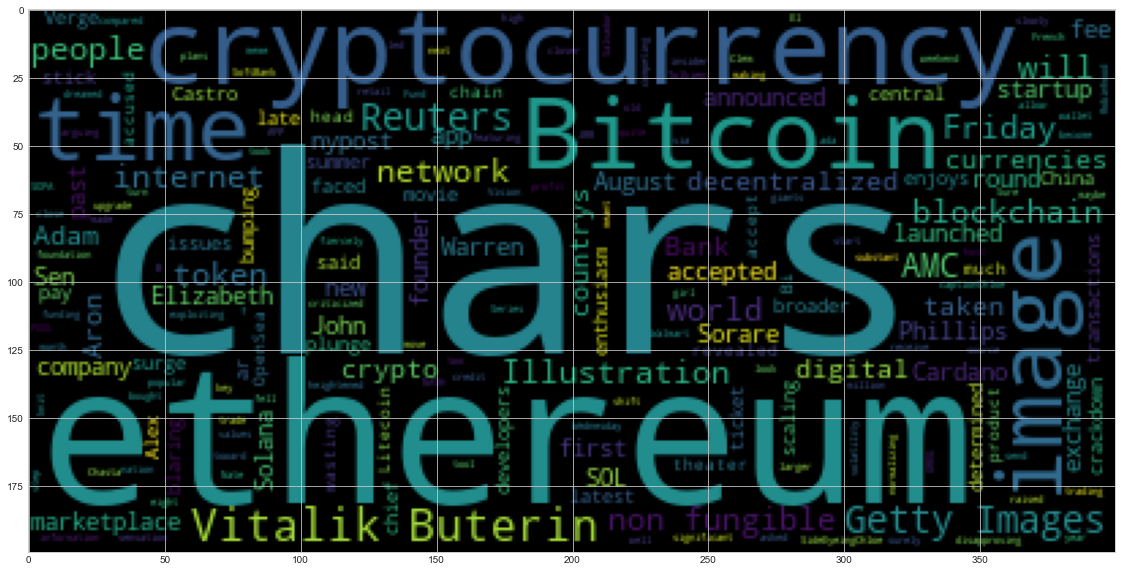

In [30]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_df['Text'])


eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
btc_big_string

'You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars] Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars] Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars] Elon Musk has performed a sudden U-turn on bitcoin over concerns about its energy usage, and says his electric car firm Tesla will no longer accept the cryptocurrency as payment – but will his decisi… [+3069 chars] Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the coun

In [34]:
# Run the NER processor on all of the text
bitcoin = nlp(btc_big_string)

# Add a title to the document
bitcoin.user_data['title'] = 'Bitcoin NER'

In [35]:
# Render the visualization
displacy.render(bitcoin, style = 'ent')

In [36]:
# List all Entities
print(bitcoin.ents)

(Bitcoin, AMC, Adam Aron, Litecoin, Bi, Four months, Twitter, first, Bitcoin, first, MP3s, Napster, Elon Musk, Tesla, Alex Castro, The Verge
, Friday, Bitcoin ATM, today, Bitcoin, El Salvador, US, Central American, first, El Salvador, at least 200, bitcoin, Tuesday, Twitter, Bitcoin, Thousands, El Salvador, Bitcoin, Nayi, New York, CNN, a volatile day, bitcoin, about 10%, Tuesday, $43,000 mark, El Salvador, June, ado, PayPal, two decades, 403 million, 23 August, UK, four, 8, days, September, spring, Rebecca McMackin, Tesla, Elon Musk, Tuesday, U.S., Bitcoin, August 6, 2021, REUTERS/, Reuters, 19, 16, Bitcoin, August 6, 2021, REUTERS/, Reuters, Adam Aron, El Zonte, El Salvador, Bitcoin Beach, Central American, Conway G. Gittens, El Zonte, El Salvador, Bitcoin Beach, Central American, Conway G. Gittens, Robinhood, next month, Wednesday)


---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
eth_big_string

'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars] As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars] You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars] OpenSea isn\'t wasting much time after its head of product was accused of exploiting insider information to turn a profit on non-fungible tokens. The marketplace has asked for and accepted Nate Chasta… [+924 chars] Robinhood plans to start a cryptocurrency wallet next month, the company announced on Wednesday. The tool will allow you to send and 

In [38]:
# Run the NER processor on all of the text
ethereum = nlp(eth_big_string)

# Add a title to the document
ethereum.user_data['title'] = 'Ethereum NER'

In [39]:
# Render the visualization
displacy.render(ethereum, style = 'ent')

In [40]:
# List all Entities
print(ethereum.ents)

(Alex Castro, The Verge
, Friday, Bitcoin, AMC, Adam Aron, Litecoin, Bi, OpenSea, Nate Chasta, Robinhood, next month, Wednesday, Clem, two-year-old, French, Sorare, SoftBank, Vision Fund 2, $680 million, $4, Vitalik Buterin, Vitalik Buterin, 2013, Getty Images, John Phillips, Vitalik Buterin, eight, JRR Tolkien's, Elizabeth Warren, Getty Images, Elizabeth Warren, this past weekend, Walmart, El Salvador, Bitcoin, Bitcoin, August 6, 2021, REUTERS/, Reuters, Adam Aron, Solana, above $100, first, Monday, more than 200%, August, Vitalik Buterin, 2015, John Phillips, TechCrunch, Vitalik Buterin, Time, 100, the past decade, Bitcoin, Kyle Russell, Playbyte, Last Friday, Dom Hofmann, Loot, one, Alexi Rosenfeld/, 500, NFT, This Tuesday, Solana (SOL, seventh, Dogecoin, Elon Musk's, Reuters, NEW YORK, Sept 3, Reuters, second, Friday, 4,000, first, May 15, 10,000, 10,000, 41)


---